# 超密度符号化（Superdense Coding）

このノートでは量子コンピューティングにおける超密度符号化（Superdense Coding: SDC）を紹介します。まず初めに作成した量子回路を Quikit のシミュレータを使ってテストし、実際の量子コンピュータで動かしてみます。

## 目次

1. [超密度符号化と量子テレポーテーション](#difference)
2. [処理手順](#process)    
    2.1 [Step 1](#step1)    
    2.2 [Step 2](#step2)    
    2.3 [Step 3](#step3)
3. [超密度符号化プロトコルのシミュレーション](#simulating)    
    3.1 [3.1 測定の可視化](#visualising)    
4. [実際の量子コンピュータにおける超密度符号化](#real_qc)


## 1. 超密度符号化と量子テレポーテーションの違い <a id='difference'></a>

量子テレポーテーションと超密度符号化は密接に関係しているので、適切に説明・区別なしには混乱を引き起こすでしょう。

量子テレポーテーションとは、古典通信と Bell pair を利用して、量子ビット ($|\psi\rangle$) の状態をある場所から他の場所へ送信させうるプロセスの事です。言い換えれば、共有エンタングルメントを利用して、ある場所にある量子ビットの量子状態を破壊して離れた場所に作り直すプロセスとも言えます。対して超密度符号化とは、１つのの量子ビット通信を使用して、２つの古典的なビットを誰かが別の組に送信できるようにする手続きの事です。

| 量子テレポーテーション                           | 超密度符号化                                     |
|:----------------------------------------------:|:-----------------------------------------------:|
| ２つの古典ビットを使って<br>１つの量子ビットを転送 | １つの量子ビットを使って<br>２つの古典ビットを転送 |

つまり、テレポーテーションプロトコルは超密度符号化の反転バージョンであり、アリスとボブが最初の持ち物を交換しただけ、ともみなせます。


![image1](images/superdense.png)




## 2. 処理手順 <a id='process'></a>

### 2.1 Step 1 <a id='step1'></a>
プロセスはある第三者 - 今回は「イブ」と呼びましょう - から始まります。イブはもつれた状態にある２つの量子ビットを用意します。彼女は最初、その２量子ビットを基底状態 $|0\rangle$ で起動します、そして１つ目の量子ビットにアダマールゲート（ $H$ ）を作用させて重ね合わせ状態を作ります。その後、１つ目の量子ビットをコント―ロール側、２つめをターゲット側として CNOT ゲート（ $CX$ ）を作用させます。このもつれた状態が、以前私たちが触れた Bell pair です。

#### 結果の状態

イブは初めにアダマールゲートを作用させました。

$H$ ゲートが１つ目の量子ビットに作用すると重ね合わせ状態に遷移し、次の状態が得られたことになります：

$$|0+\rangle  =  \tfrac{1}{\sqrt{2}}(|00\rangle + |01\rangle)$$

その後、イブは CNOT ゲートを作用させました。CNOT ゲートは２つの量子ビットをもつれさせるので、もしコントロール側が $|1\rangle$ ならばターゲット側が反転します。コントロール側は１つ目の量子ビットである事に注意しましょう。

$$\text{CNOT} \tfrac{1}{\sqrt{2}}(|00\rangle + |01\rangle) = \tfrac{1}{\sqrt{2}}(|00\rangle + |11\rangle)$$

### 2.2 Step 2 <a id='step2'></a>

イブは１つ目の量子ビットをアリスに、２つ目をボブに送りました。この手順の目標は、アリスが彼女の持っている量子ビットを使って、２つの古典ビット情報をボブに送信することです。しかしその前に、アリスはその２ビットの送りたい情報に応じて、彼女の持つ量子ビットにいくつかのゲートの組を作用させる必要があります。

超密度符号化の為の変換規則（アリスの手順）
量子ゲート/規則：
<!--- Table does not render properly when built to html. This is a problem with nbconvert. Replaced with image
| 送りたい情報 | 作用させるゲート | 作用結果の状態 ($\cdot\sqrt{2}$)|
|:----------------:|:------------:|:--------------------------------:|
|00                |$I$           | $|00\rangle + |11\rangle$        |
|01                |$X$           | $|01\rangle + |10\rangle$        |
|10                |$Z$           | $|00\rangle - |11\rangle$        |
|11                |$ZX$          | $|10\rangle - |01\rangle$        |
--->

![image2](images/superdense_table1.png)<br>

従って、もしアリスが 00 を送りたいならば、彼女は自分の量子ビットには何も作用させません（恒等ゲート（ $I$ ）を作用させます）。01 ならば、$X$ ゲートを作用させます。何を送りたいかによって、それに応じたゲートを作用させればよいのです。そうしたら、アリスは彼女の量子ビットをボブに送り、手順の最終ステップに進みます。


### 2.3 Step 3 <a id='step3'></a>

ボブは（１つ目の量子ビットである）アリスの量子ビットを受け取り、彼の量子ビットを使ってアリスのメッセージを複合します。複合に対して、ボブは何の情報もいらない事に注意してください。彼に必要なのは、つぎに示す複合手順の知識だけです。

ボブは、１つ目の量子ビットをコントロール側、２つ目をターゲット側として CNOT ゲートを作用させます。そしてアダマールゲートを作用させ、最後に両方の量子ビットを観測する事で、アリスの量子ビットで符号化された２つの古典ビットを取り出すことが出来ます。

<!--- Table does not render properly when built to html. This is a problem with nbconvert. Replaced with image
| Bob Recieves:             | After CNOT-gate:          | After H-gate:  |
|:-------------------------:|:-------------------------:|:--------------:|
| $|00\rangle + |11\rangle$ | $|00\rangle + |01\rangle$ | $|00\rangle$   |
| $|01\rangle + |10\rangle$ | $|01\rangle + |11\rangle$ | $|01\rangle$   |
| $|00\rangle - |11\rangle$ | $|00\rangle - |10\rangle$ | $|10\rangle$   |
| $|10\rangle - |01\rangle$ | $|11\rangle - |01\rangle$ | $|11\rangle$   |
--->

![image3](images/superdense_table2.png)<br>

When Bob performs the measurements, he ends up with four possible outcomes with probability of 1 each. Note that the last outcome has a negative sign $-|11\rangle$, writing it as $|11\rangle$ is also correct because the probability is calculated as the amplitude of squared.

観測を行うと、各々１の確率で4つの可能な結果が得られます。この最終的な結果には $-|11\rangle$ という負の符号をもつもの（表には $|11\rangle$ と書かれています）が含まれますが、これもまた正しい事に注意してください。なぜなら、確率は振幅の２乗で計算されるからです。


## 3. 超密度符号化プロトコルのシミュレーション <a id='simulating'></a>


In [1]:
# 必要なすべてのライブラリをインポートします
from qiskit import *
from qiskit.visualization import plot_histogram
# Jupyter Notebook 上で画像を見やすく表示するコマンドです
%config InlineBackend.figure_format = 'svg'

量子もつれの組を作るには、$H$ ゲートの後に CNOT ゲートが必要である事はわかっています。なので、`QuantumCircuit` を引数にもち、添字 `a` , `b` で表した２つの量子ビットをもつれさせる関数を作りましょう。

In [ ]:
# QuantumCircit (qc) と２つの整数 (a,b) を引数にとる関数を定義します。
def create_bell_pair(qc, a, b):
    qc.h(a) # １つめの量子ビットに H ゲートを作用させます。
    qc.cx(a,b) # １つめの量子ビットをコントロール側として、CNOT ゲートを作用させます。

次に、メッセージを符号化しましょう。次の4つのメッセージ（ `00`, `10`, `01`, `11` ）が送信できる事はわかっています。なので、このメッセージを引数に取り、対応するゲートを作用させるような関数を作りましょう。

In [ ]:
# QuantumCircuit (qc)、量子ビットの添え字（ qubit ）、
# メッセージの文字列（ msg ）を引数にとる関数を定義します
def encode_message(qc, qubit, msg):
    if msg == "00":
        pass    # 00 を送信するには何もしません
    elif msg == "10":
        qc.x(qubit) # 10 を送信するには X-ゲートを作用させます
    elif msg == "01":
        qc.z(qubit) # 01 を送信するには Z-ゲートを作用させます
    elif msg == "11":
        qc.z(qubit) # 11 を送信するには、Zゲートを作用させた後に
        qc.x(qubit) # Xゲートを作用させます。
    else:
        print("Invalid Message: Sending '00'")

最後に、メッセージを復号します。$H$ ゲートの後に CNOT ゲートを作用させれば復号できる事はわかっているので、これについても関数を作りましょう。

In [ ]:
def decode_message(qc, a, b):
    qc.cx(a,b)
    qc.h(a)

これらを使って最終的なシミュレーション手順を完成させましょう。

In [ ]:
# 2量子ビット回路を作成します
qc = QuantumCircuit(2)

# まず、イブがアリスとボブに渡す量子もつれペアを作ります
create_bell_pair(qc, 0, 1)
qc.barrier() # ここでは回路に「バリア（仕切り）」を挿入します。
             #「バリア」はダイアグラム内のゲートを分離し、
             # 回路のどの部分がどのようなものかを明確にします
             # （回路をビジュアライズするとどのようなものかわかるでしょう）

# ここで、量子ビット_0 をアリスへ、量子ビット_1 をボブに送ります

# 次に、アリスは彼女のメッセージを 量子ビット_0 上に符号化します。
# 今回は '10' を送りたいしましょう。
# 読者自身でこの値を変更し、それが回路にどう影響するかを見ることもできます

message = "10"
encode_message(qc, 0, message)
qc.barrier()
# そうしたら、アリスは自分の量子ビットをボブに送ります。

# ボブは 量子ビット_0 を受け取ったら、復号手順を適応します。
decode_message(qc, 0, 1)

# 最後に、ボブが彼の量子ビットを測定することでアリスのメッセージを取得します
qc.measure_all()

# 出力を描画しましょう
qc.draw(output = "mpl")

### 3.1 測定の可視化 <a id='visualising'></a>

{'11': 1024}


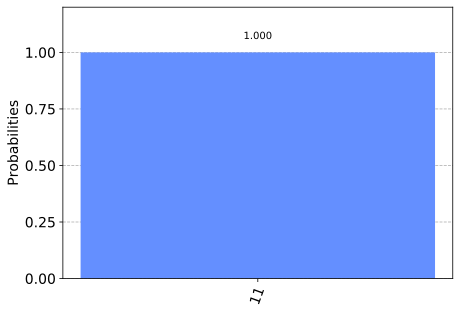

In [3]:
backend = Aer.get_backend('qasm_simulator')
job_sim = execute(qc, backend, shots=1024)
sim_result = job_sim.result()

measurement_result = sim_result.get_counts(qc)
print(measurement_result)
plot_histogram(measurement_result)

シミュレーターでは完全な量子コンピュータがシミュレートされています。正しいメッセージの測定がエラーなしに 100% 出来ることがわかります。

## 4. 実際の量子コンピュータにおける超密度符号化 <a id='real_qc'></a>


それでは、実際の量子コンピュータ上で超密度符号化がどのように動作するのかを見ていきましょう。

まず初めに、
First, we want to load our account to get the least busy quantum system

In [4]:
from qiskit import IBMQ
from qiskit.providers.ibmq import least_busy
shots = 256

# Load local account information
IBMQ.load_account()
provider = IBMQ.get_provider(hub='ibm-q')
backend = least_busy(provider.backends(filters=lambda x: x.configuration().n_qubits >= 2 
                                       and not x.configuration().simulator 
                                       and x.status().operational==True))
print("least busy backend: ", backend)
job = execute(qc, backend=backend, shots=shots)


least busy backend:  ibmqx2


In [5]:
# Monitoring our job
from qiskit.tools.monitor import job_monitor
job_monitor(job)

Job Status: job has successfully run


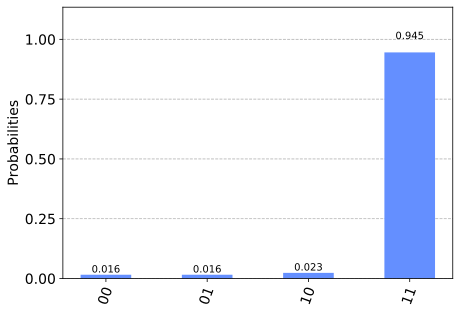

In [6]:
# Plotting our result
result = job.result()
plot_histogram(result.get_counts(qc))

As we see that there are a few results from the other three states when run in a real quantum computer. These are due to errors in the gates that were applied and qubit decoherence.

In [7]:
correct_results = result.get_counts(qc)['11']
accuracy = (correct_results/float(shots))*100
print("Accuracy = %.2f%%" % accuracy)

Accuracy = 94.53%


In [8]:
import qiskit
qiskit.__qiskit_version__

{'qiskit-terra': '0.12.0',
 'qiskit-aer': '0.4.0',
 'qiskit-ignis': '0.2.0',
 'qiskit-ibmq-provider': '0.4.6',
 'qiskit-aqua': '0.6.4',
 'qiskit': '0.15.0'}